In [95]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Tickers and date range for data accessing

In [119]:
tickers = ['WBD', 'BCC', 'SOLV', 'PFE', 'OXY', 'PG', 'T', 'TJX', 'MMM', 'BA', 'O', 'KMI', 
 'CSCO', 'CVS', 'DIS', 'MA', 'RTX', 'AXP', 'BX', 'VTWG', 'VTI', 'BST', 'SPLV', 
 'DWX', 'BOND', 'PPA', 'PGX', 'BGB', 'VGSLX', 'JFNIX', 'WAAEX']

years_delta = 1
end_date = datetime.today()
start_date = end_date - timedelta(days =  years_delta * 365)

## Downloding the adjusted close price
> This is done as the `adj Close` is relatively more accurate when it comes to close prices as it includes dividends and stock splits.
> An optimal portfolio would underweigh a portfolio that pays more dividends as it wouldn't be refleced if you use `close price`

In [120]:
adj_close_df = pd.DataFrame()

for scrip in tickers:
    data = yf.download(scrip, start = start_date, end = end_date)
    adj_close_df[scrip] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [121]:
adj_close_df

,WBD,BCC,SOLV,PFE,OXY,PG,T,TJX,MMM,BA,...,BST,SPLV,DWX,BOND,PPA,PGX,BGB,VGSLX,JFNIX,WAAEX
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-12,10.32,85.408211,NaN,31.086363,62.295567,139.778625,13.607358,87.655937,71.200050,191.300003,...,30.012608,57.003456,31.529083,82.790337,81.917038,9.904876,9.909245,103.762062,62.678051,30.920000
2023-10-13,10.37,85.892967,NaN,30.321484,63.428753,141.114746,13.522606,87.340485,70.928116,184.910004,...,29.355326,57.423973,31.395041,83.047745,81.986580,9.829623,9.818748,103.549202,63.194630,30.780001
2023-10-16,10.90,86.002716,NaN,31.416870,64.414131,142.460663,13.569692,88.405128,71.935890,184.929993,...,29.577507,57.961830,31.605680,82.771278,82.254807,9.848436,9.827797,104.748985,63.605976,31.219999
2023-10-17,10.92,87.255768,NaN,30.925837,64.571785,142.645950,13.729777,89.321915,72.423782,185.600006,...,29.299784,58.030285,31.557810,82.132515,82.652161,9.773189,9.782552,104.584496,63.787739,31.530001
2023-10-18,10.58,85.499672,NaN,29.660473,65.527596,146.322800,13.484938,89.164185,70.704155,185.690002,...,28.855425,57.766243,31.184401,81.655846,81.768013,9.735561,9.701104,102.301041,62.955471,30.709999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07,7.72,141.270004,66.290001,29.200001,55.910000,167.119995,21.503902,112.129997,134.850006,155.910004,...,35.770000,70.690002,37.439999,93.120003,116.250000,12.240000,12.470000,133.649994,78.910004,38.880001
2024-10-08,7.72,142.020004,67.129997,29.180000,54.320000,168.160004,21.582888,113.449997,134.690002,154.649994,...,36.250000,71.099998,37.419998,93.239998,116.480003,12.350000,12.490000,133.850006,79.519997,39.340000
2024-10-09,7.73,142.389999,69.180000,30.190001,53.900002,169.270004,21.652000,113.980003,135.009995,149.369995,...,36.529999,71.500000,37.480000,93.099998,116.889999,12.320000,12.460000,133.899994,79.809998,39.540001


## Calculate the Lognormal returns for each scrip
> The `shift` operator help you take in the value after shifting the index from 1 row down. That is, the first index would be
> from the date 15-10-2019 after shifting instead of 14-10-2019

In [122]:
lognormal_rets = np.log(adj_close_df/adj_close_df.shift(1) ) 

In [123]:
#drop the missing values 
lognormal_rets = lognormal_rets.dropna()

In [124]:
lognormal_rets

,WBD,BCC,SOLV,PFE,OXY,PG,T,TJX,MMM,BA,...,BST,SPLV,DWX,BOND,PPA,PGX,BGB,VGSLX,JFNIX,WAAEX
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-02,-0.035904,-0.026500,-0.032356,-0.006152,0.013170,-0.000062,0.001142,-0.002310,-0.012630,-0.007734,...,-0.006355,-0.002600,-0.004868,-0.001873,-0.007283,-0.007598,-0.000845,-0.012698,-0.019687,-0.019476
2024-04-03,0.029055,0.013073,-0.046036,-0.012051,0.006668,-0.027913,0.005124,-0.022263,0.003763,-0.016731,...,0.001662,-0.005065,0.000861,0.000551,0.003598,0.002539,-0.002539,0.000756,0.003559,-0.000273
2024-04-04,-0.033783,-0.011731,0.047530,-0.021163,-0.001182,-0.004493,-0.002274,-0.015853,-0.028849,-0.008854,...,-0.013090,-0.008035,-0.001722,0.002862,0.000499,0.005900,-0.005950,-0.006320,-0.012788,-0.009885
2024-04-05,-0.014320,0.018862,0.044659,0.000375,0.023672,0.004173,-0.008574,0.011010,0.005397,-0.000819,...,0.011983,0.003871,-0.004318,-0.005401,0.011797,-0.002524,0.002554,0.005732,0.008132,0.010704
2024-04-08,0.023754,0.002891,-0.044510,-0.003005,-0.007537,-0.000385,-0.009807,-0.006009,0.009838,-0.008665,...,-0.006670,-0.000464,0.002306,0.000663,0.000788,-0.002531,0.004243,0.010535,-0.000687,0.008157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04,0.005155,0.004401,0.007111,0.008433,0.017549,-0.007316,-0.006369,-0.003221,0.003629,0.029329,...,0.014694,0.004484,0.000000,-0.006826,0.010972,-0.005648,0.012935,-0.005256,0.002897,0.012001
2024-10-07,-0.007742,0.016919,-0.021638,0.021462,0.002687,-0.010476,-0.005951,-0.022574,-0.003110,0.005854,...,0.003360,-0.011813,-0.006655,-0.003431,-0.001118,-0.009756,0.001605,-0.008048,-0.007575,-0.013286
2024-10-08,0.000000,0.005295,0.012592,-0.000685,-0.028851,0.006204,0.003666,0.011703,-0.001187,-0.008114,...,0.013330,0.005783,-0.000534,0.001288,0.001977,0.008947,0.001603,0.001495,0.007701,0.011762


## Covarience matrix
> The cov matrix helps you measure the total risk of the portfolio. Each asset has a certain correlation and covarience with
> each other. So, we can std dev in the most optimal way possible using this.


In [125]:
# multiply by 252 to convert the result from daily to annualized 
cov_matrix = lognormal_rets.cov() * 252 
cov_matrix

,WBD,BCC,SOLV,PFE,OXY,PG,T,TJX,MMM,BA,...,BST,SPLV,DWX,BOND,PPA,PGX,BGB,VGSLX,JFNIX,WAAEX
WBD,0.235883,0.073046,0.020705,0.037479,0.008388,-0.001743,0.010401,0.014646,0.032188,0.051012,...,0.006100,0.014421,0.021736,0.005204,0.016221,0.012869,0.000824,0.027610,0.011557,0.027542
BCC,0.073046,0.164038,0.025702,0.021395,0.023623,-0.013464,-0.001362,0.022012,0.036361,0.042484,...,0.031295,0.010972,0.020510,0.002799,0.034210,0.014378,0.004413,0.030376,0.019472,0.050624
SOLV,0.020705,0.025702,0.122262,0.012304,0.010743,0.000362,0.012391,0.005860,0.007798,0.022520,...,0.010834,0.007417,0.005103,-0.001584,0.013212,0.003111,0.004511,0.012841,0.004650,0.017985
PFE,0.037479,0.021395,0.012304,0.055564,-0.000167,0.004762,0.015087,0.010899,0.026529,0.022625,...,-0.000631,0.009016,0.009227,0.003293,0.006100,0.007383,0.001680,0.013735,0.011676,0.009137
OXY,0.008388,0.023623,0.010743,-0.000167,0.049932,-0.005760,0.003848,0.000216,0.001941,0.019727,...,0.005817,0.005271,0.004856,-0.002026,0.012736,0.000913,0.001442,0.005928,0.002168,0.012388
PG,-0.001743,-0.013464,0.000362,0.004762,-0.005760,0.024540,0.009648,0.002921,0.007146,-0.006279,...,-0.005354,0.006563,0.002321,0.002688,-0.002144,0.002269,-0.001455,0.004953,0.002873,-0.002599
T,0.010401,-0.001362,0.012391,0.015087,0.003848,0.009648,0.036097,0.001567,-0.003177,-0.003569,...,-0.009076,0.006708,0.005205,0.002797,-0.000900,0.004888,0.002310,0.007881,0.003206,-0.002765
TJX,0.014646,0.022012,0.005860,0.010899,0.000216,0.002921,0.001567,0.034407,0.007168,0.014268,...,0.011464,0.008114,0.006060,0.001652,0.009111,0.004917,0.003320,0.010110,0.010606,0.014984
MMM,0.032188,0.036361,0.007798,0.026529,0.001941,0.007146,-0.003177,0.007168,0.113260,0.023957,...,0.007013,0.010371,0.010224,0.001281,0.010798,0.004818,0.001865,0.014070,0.009406,0.018792
BA,0.051012,0.042484,0.022520,0.022625,0.019727,-0.006279,-0.003569,0.014268,0.023957,0.115739,...,0.020014,0.009010,0.015271,-0.000333,0.030799,0.006828,0.005891,0.011605,0.012886,0.027381


## Portfolio Performance 
> Standard deviation

> Expected returns

> Sharpe ratio

In [126]:
def variance(weights, cov):
    return weights.T @ cov @ weights

def std_dev(weights, cov):
    return np.sqrt(variance(weights,cov))

## Expected returns from historical values 
> this should be optimized 

In [127]:

def exp_returns(weights, log_returns):
    # Check if the weights sum to 1, normalize if necessary
    if np.sum(weights) != 1:
        weights = weights / np.sum(weights)

    # Calculate the mean of the log returns
    mean_log_returns = log_returns.mean()

    # Compute expected returns using matrix multiplication
    expected_return = np.dot(weights, mean_log_returns) * 252  # Annualize the returns (assuming 252 trading days)

    return expected_return

## Sharpe Ratio 
> SR = ( portfolio returns - risk free rate ) / std dev

In [128]:
# risk free rate is usually around 3 % 

def sharpe_ratio(weights, log_returns, cov, risk_free_rate):
    return ( exp_returns(weights, log_returns) - risk_free_rate ) / std_dev( weights, cov )

In [129]:
# negative sharpe ratio
# this functoins is to minimize the value

def neg_sharpe_ratio(weights, log_returns, cov, risk_free_rate):
    return -1 * ( exp_returns(weights, log_returns) - risk_free_rate ) / std_dev( weights, cov )

## Constraints and bounds
conditions that must be met by the solution during optimization. 
> Sum of all portfolio weights must equal to 1.

> type is set to `equqlity` => equality,

> Fun is set to `checksum' => ensures if the portfolio weights sum upto 1

> Bounds are the limits on variables during optimization. Here, the variables are portfolio weights, and each should be
> between 0 and 1

In [142]:
constraints = { 'type' : 'eq', 'fun' : lambda weights: np.sum( weights ) - 1 }
# The max size of a position could only be 40% and the min could only be 0%
# no negatives as we are not going short on assets. We are only on the buy side
bounds = [ (0, 0.05) for each in range( len( tickers ) ) ] 

In [143]:
# setting initial weights
init_weights = np.array( [ 1 / len(tickers) ] * len(tickers) )
init_weights

array([0.03225806, 0.03225806, 0.03225806, 0.03225806, 0.03225806,
       0.03225806, 0.03225806, 0.03225806, 0.03225806, 0.03225806,
       0.03225806, 0.03225806, 0.03225806, 0.03225806, 0.03225806,
       0.03225806, 0.03225806, 0.03225806, 0.03225806, 0.03225806,
       0.03225806, 0.03225806, 0.03225806, 0.03225806, 0.03225806,
       0.03225806, 0.03225806, 0.03225806, 0.03225806, 0.03225806,
       0.03225806])

## Optimization
> SLSQP, AKA sequential least square quadratic programming, which is a numerical optimization technique suitable for solving nonlinear optimization problems with constraints

In [144]:
risk_free_rate = 0.0409

optimized_res = minimize(
    neg_sharpe_ratio, init_weights, args = ( lognormal_rets, cov_matrix, risk_free_rate), 
    method = 'SLSQP',
    constraints = constraints,
    bounds = bounds
)

In [145]:
# accesses the optimal weights from res
optimal_weights = optimized_res.x 
optimal_weights

array([0.       , 0.       , 0.       , 0.0256294, 0.       , 0.05     ,
       0.05     , 0.05     , 0.05     , 0.       , 0.05     , 0.05     ,
       0.05     , 0.       , 0.       , 0.0243706, 0.05     , 0.05     ,
       0.       , 0.       , 0.05     , 0.05     , 0.05     , 0.05     ,
       0.05     , 0.05     , 0.05     , 0.05     , 0.05     , 0.05     ,
       0.       ])

In [146]:
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = exp_returns(optimal_weights, lognormal_rets)
optimal_portfolio_volatility = std_dev(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, lognormal_rets, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
WBD: 0.0000
BCC: 0.0000
SOLV: 0.0000
PFE: 0.0256
OXY: 0.0000
PG: 0.0500
T: 0.0500
TJX: 0.0500
MMM: 0.0500
BA: 0.0000
O: 0.0500
KMI: 0.0500
CSCO: 0.0500
CVS: 0.0000
DIS: 0.0000
MA: 0.0244
RTX: 0.0500
AXP: 0.0500
BX: 0.0000
VTWG: 0.0000
VTI: 0.0500
BST: 0.0500
SPLV: 0.0500
DWX: 0.0500
BOND: 0.0500
PPA: 0.0500
PGX: 0.0500
BGB: 0.0500
VGSLX: 0.0500
JFNIX: 0.0500
WAAEX: 0.0000
Expected Annual Return: 0.2540
Expected Volatility: 0.0850
Sharpe Ratio: 2.5066


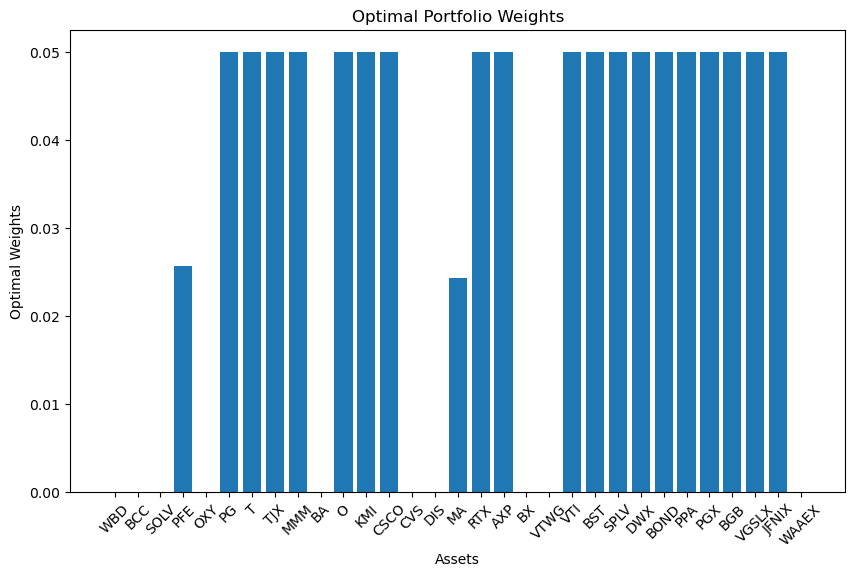

In [147]:
plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')
# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.show()